In [ ]:
# plotitng heatmaps

# New Section

In [7]:
#importing all the libraries needed
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# create original network:
# for TESTING performance on training data variation:
import networkx as nx
from scipy.sparse.csgraph import dijkstra

par4 = 11
R = 1134
print ("testing parameter: ", par4)
# for TESTING
GT = nx.powerlaw_cluster_graph(R, par4, 0.4, seed=None)
# for TESTING
A = nx.adjacency_matrix(GT)
data_test = np.array(dijkstra(A))
data_test_original = data_test.copy()

testing parameter:  11


In [ ]:
# load original test data:
# original = np.loadtxt("/content/drive/My Drive/PhD work/data/undirected networks/virgili emails/dHp.txt")
original = data_test

In [ ]:
# load data
# reconstructed_40 = np.loadtxt("/content/drive/My Drive/PhD work/Projects/parameter estimation/virgili/recovered for 8_10_12/R_40.csv", delimiter = ',')
reconstructed_40 = np.loadtxt("/content/drive/MyDrive/PhD work/Projects/parameter estimation/training variation - test performance/R_40.csv", delimiter = ',')

In [ ]:

print (reconstructed_40.shape)
print (original.shape)

(1134, 1134)
(1134, 1134)


In [ ]:
# reconstructed_80 = np.loadtxt("/content/drive/My Drive/PhD work/Projects/parameter estimation/virgili/recovered for 8_10_12/R_80.csv", delimiter = ',')
reconstructed_80 = np.loadtxt("/content/drive/MyDrive/PhD work/Projects/parameter estimation/training variation - test performance/R_80.csv", delimiter = ',')

In [ ]:
# reconstructed_99 = np.loadtxt("/content/drive/My Drive/PhD work/Projects/parameter estimation/virgili/recovered for 8_10_12/R_99.csv", delimiter = ',')
reconstructed_99 = np.loadtxt("/content/drive/MyDrive/PhD work/Projects/parameter estimation/training variation - test performance/R_99.csv", delimiter = ',')

In [ ]:
# calculate difference
diff_40 = reconstructed_40 - original
diff_80 = reconstructed_80 - original
diff_99 = reconstructed_99 - original

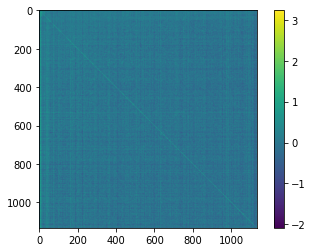

In [ ]:
# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 300

matrix = np.triu(diff_40)
# sns.heatmap(diff_40, annot=True, mask=matrix)
plt.imshow(diff_40)
plt.colorbar()
plt.show()

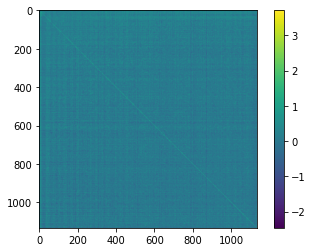

In [ ]:
matrix = np.triu(diff_80)
# sns.heatmap(diff_80, annot=True, mask=matrix)
plt.imshow(diff_80)
plt.colorbar()
plt.show()

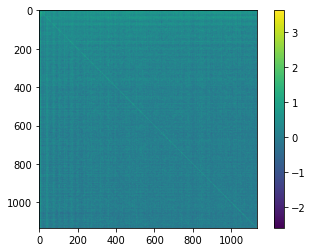

In [ ]:
matrix = np.triu(diff_99)
# sns.heatmap(diff_80, annot=True, mask=matrix)
plt.imshow(diff_99)
plt.colorbar()
plt.show()

In [ ]:
# scatter plot for sensitivity analysis

In [ ]:
np.multiply(s,10)

array([230., 260., 235., 240., 280., 320., 350.])

In [ ]:
s = [23, 26, 23.5, 24, 28, 32, 35]
x = [1,2,3,4,5,6,7]
y = [1,2,3,4,5,6,7]

plt.scatter(x,y, s=np.multiply(s,15), alpha=0.4, cmap="Blues")
plt.axis("off")
plt.show()

In [ ]:
# scatterplots of comaprison:

In [82]:
# # load data-virgili emails
# path = "/content/drive/MyDrive/PhD work/Projects/parameter estimation/virgili/5_7_9/"

# original = np.loadtxt("/content/drive/MyDrive/PhD work/data/undirected networks/virgili emails/dHp.txt")
# reconstructed_40 = np.loadtxt(path + "R_40.csv", delimiter = ',')
# reconstructed_80 = np.loadtxt(path + "R_80.csv", delimiter = ',')
# reconstructed_99 = np.loadtxt(path + "R_99.csv", delimiter = ',')

# for Matrix completion data
# path = "/content/drive/MyDrive/PhD work/Projects/parameter estimation/virgili/MC results/"
# reconstructed_40 = np.loadtxt(path + "R_40.txt")
# reconstructed_80 = np.loadtxt(path + "R_80.txt")
# reconstructed_99 = np.loadtxt(path + "R_99.txt")



# load data-powerlaw 8
# path = "/content/drive/MyDrive/PhD work/Projects/parameter estimation/training variation - test performance/5_7_9/"

original = np.loadtxt("/content/drive/MyDrive/PhD work/Projects/parameter estimation/powerlaw_8.txt")
# reconstructed_40 = np.loadtxt(path + "R_40.csv", delimiter = ',')
# reconstructed_80 = np.loadtxt(path + "R_80.csv", delimiter = ',')
# reconstructed_99 = np.loadtxt(path + "R_99.csv", delimiter = ',')

# for Matrix completion data
path = "/content/drive/MyDrive/PhD work/Projects/parameter estimation/training variation - test performance/MC results/powerlaw 8/"
reconstructed_40 = np.loadtxt(path + "R_40.txt")
reconstructed_80 = np.loadtxt(path + "R_80.txt")
reconstructed_99 = np.loadtxt(path + "R_99.txt")


In [83]:
original.shape

(1133, 1133)

In [84]:
reconstructed_80.shape

(1133, 1133)

In [93]:
# mc without bounds-----------------------------------------------------------------------------------------------------------

# mc without bounds - sampled network:
# path = "/content/drive/MyDrive/PhD work/Projects/parameter estimation/virgili/5_7_9/"
# path for MC results without bounds
mc = 'M_rlz1'

y2_sam =  reconstructed_99

y2 =  reconstructed_99
print (y2.shape)
y2 = np.ravel(y2)
print (y2.shape)
y2_sam = np.ravel(y2_sam)
print (y2_sam.shape)

# original matrix
x =  original
print (x.shape)
x = np.ravel(x)
print (x.shape)

# plt.figure(1)
r = len(y2)


# get max value of hop distances possible
maxval = max(x)
# array of all possible values of hop distances possible
allval = np.arange(int(maxval)+1)
print (allval)


# plotting the ideal expected line:------
# plt.plot(x, x, 'y--')
# exit()

# for each original entry [0 to max] -- 
d={}
for pp in allval:

  val = allval[pp]

  maximum = 0
  xx = np.ones((r,1))
  for i in range(r):  #------------------------------------------------------------------------
    if x[i] == val:
      # plt.plot(val, y2[i],'bo')   # plot the predicted values for original D[i,j] = 1
      if y2[i]>maximum:
        maximum = y2[i]


  # counting entries for D[i,j] = 1
  l = int(maximum) + 1
  txt = np.zeros((l,1))
  xx = np.ones((l,1))
  yy = np.arange(l)

  for i in range(r):   #------------------------------------------------------------------------
    if x[i] == val:
      ind = int(y2[i])
      txt[ind] = txt[ind] + 1

  d[pp] = txt



(1133, 1133)
(1283689,)
(1283689,)
(1133, 1133)
(1283689,)
[0 1 2 3 4]


In [ ]:
d

In [94]:
int(maxval)

4

In [95]:
y0 = d[0]
y1 = d[1]
y2 = d[2]
y3 = d[3]
y4 = d[4]
# y5 = d[5]
# y6 = d[6]
# y7 = d[7]
# y8 = d[8]

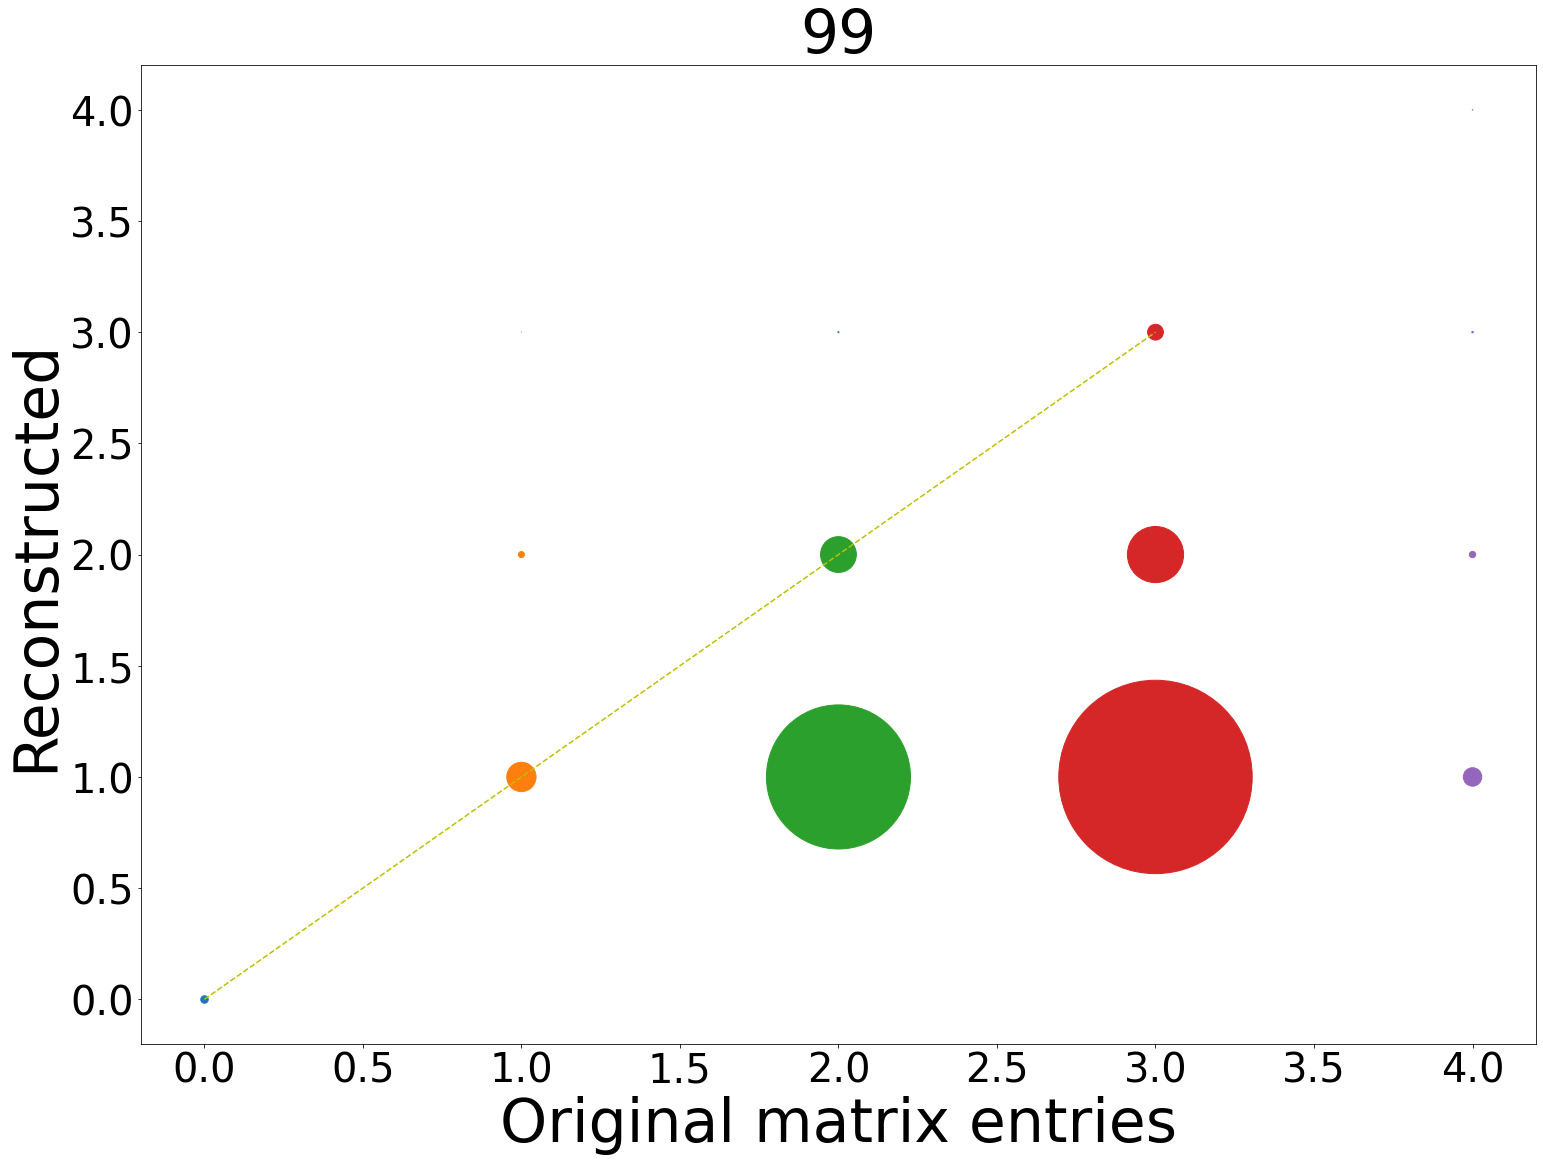

In [96]:
plt.figure(1)


s = y0
y = np.arange(len(y0))
x = []
for i in range(len(y)):
  x.append(0)
plt.scatter(x,y,s=np.multiply(s,0.05))

s = y1
y = np.arange(len(y1))
x = []
for i in range(len(y)):
  x.append(1)
plt.scatter(x,y,s=np.multiply(s,0.05))

s = y2
y = np.arange(len(y2))
x = []
for i in range(len(y)):
  x.append(2)
plt.scatter(x,y,s=np.multiply(s,0.05))

s = y3
y = np.arange(len(y3))
x = []
for i in range(len(y)):
  x.append(3)
plt.scatter(x,y,s=np.multiply(s,0.05))

s = y4
y = np.arange(len(y4))
x = []
for i in range(len(y)):
  x.append(4)
plt.scatter(x,y,s=np.multiply(s,0.05))

# s = y5
# y = np.arange(len(y5))
# x = []
# for i in range(len(y)):
#   x.append(5)
# plt.scatter(x,y,s=np.multiply(s,0.05))

# s = y6
# y = np.arange(len(y6))
# x = []
# for i in range(len(y)):
#   x.append(6)
# plt.scatter(x,y,s=np.multiply(s,0.05))

# s = y7
# y = np.arange(len(y7))
# x = []
# for i in range(len(y)):
#   x.append(7)
# plt.scatter(x,y,s=np.multiply(s,0.05))

# s = y8
# y = np.arange(len(y8))
# x = []
# for i in range(len(y)):
#   x.append(8)
# plt.scatter(x,y,s=np.multiply(s,0.05))

# s = y9
# y = np.arange(len(y9))
# x = []
# for i in range(len(y)):
#   x.append(9)
# plt.scatter(x,y,s=s)

x = np.arange(maxval)
plt.plot(x,x,'y--')

plt.ylabel('Reconstructed', fontsize = 60)
plt.xlabel('Original matrix entries', fontsize = 60)
plt.title('99', fontsize = 60)

plt.rcParams['figure.figsize'] = [25, 18]

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize=40)
plt.rc('legend',fontsize=40)



plt.show()

In [ ]:
np.arange(len(y8))

array([0, 1, 2, 3, 4, 5])

In [ ]:
# visualize hop distance histograms

In [ ]:
ori = original.flatten()
len(ori)

1283689

In [ ]:
r40 = reconstructed_40.flatten()
r80 = reconstructed_80.flatten()
r99 = reconstructed_99.flatten()

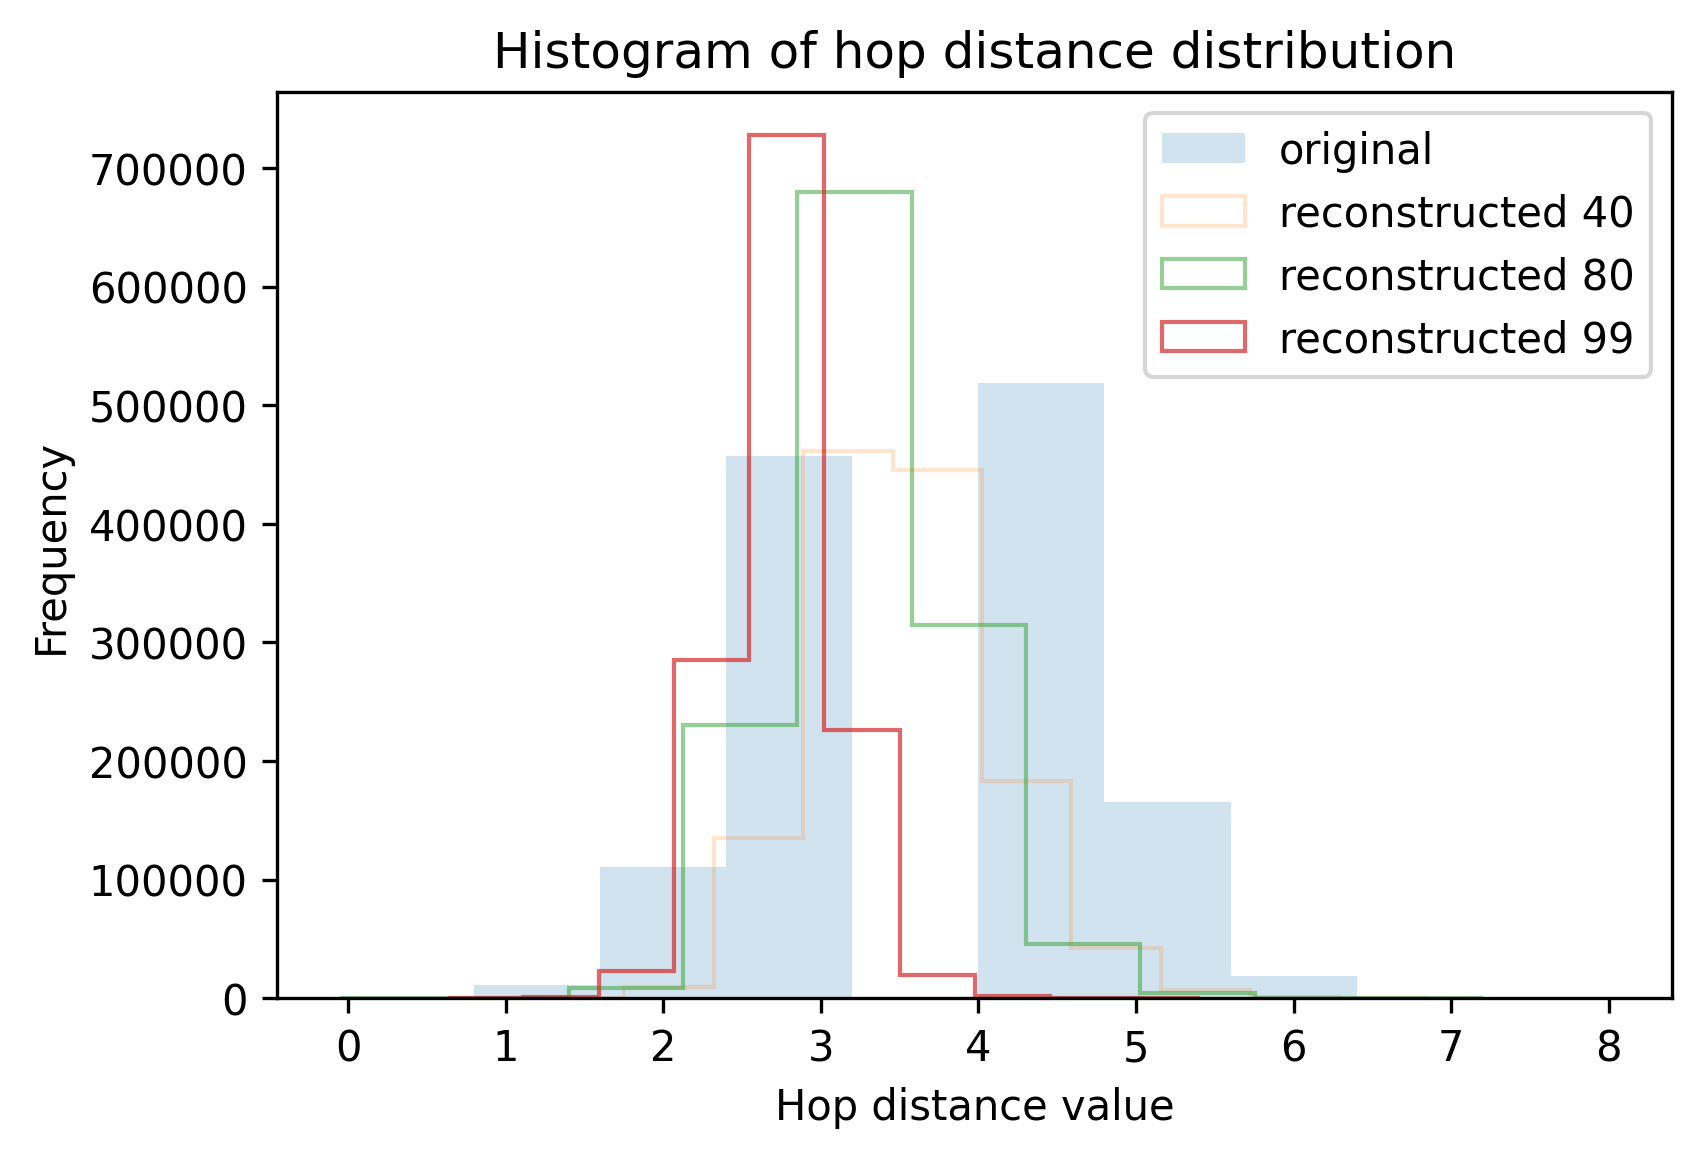

In [ ]:
# load original test data:
original = np.loadtxt("/content/drive/My Drive/PhD work/data/undirected networks/virgili emails/dHp.txt")

plt.hist(ori, histtype='stepfilled', alpha=0.6, label = 'original')
# plt.hist(r40, histtype='step', alpha=0.2, label = 'reconstructed 40')
# plt.hist(r80, histtype='step', alpha=0.5, label = 'reconstructed 80')
# plt.hist(r99, histtype='step', alpha=0.7, label = 'reconstructed 99')

plt.ylabel('Frequency')
plt.xlabel('Hop distance value')
plt.title('Histogram of hop distance distribution')


plt.legend()
plt.show()

In [ ]:
# plot degree distribution:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import networkx as nx

In [3]:
dHp = np.loadtxt('/content/drive/MyDrive/PhD work/data/undirected networks/virgili emails/dHp.txt')

G = nx.DiGraph()
n = len(dHp)

for i in range(n):
  G.add_node(i)

for i in range(n):
    for j in range(n):
        if dHp[i,j]==1: #detecting where there is an edge
            G.add_edge(i,j)    
    
deg = np.zeros((G.number_of_nodes()))
        
j = 0        
for nd in G.nodes():
    deg[j] = G.degree(nd)
    j = j + 1  

In [4]:
deg

array([60., 46., 76., ...,  2.,  2.,  2.])

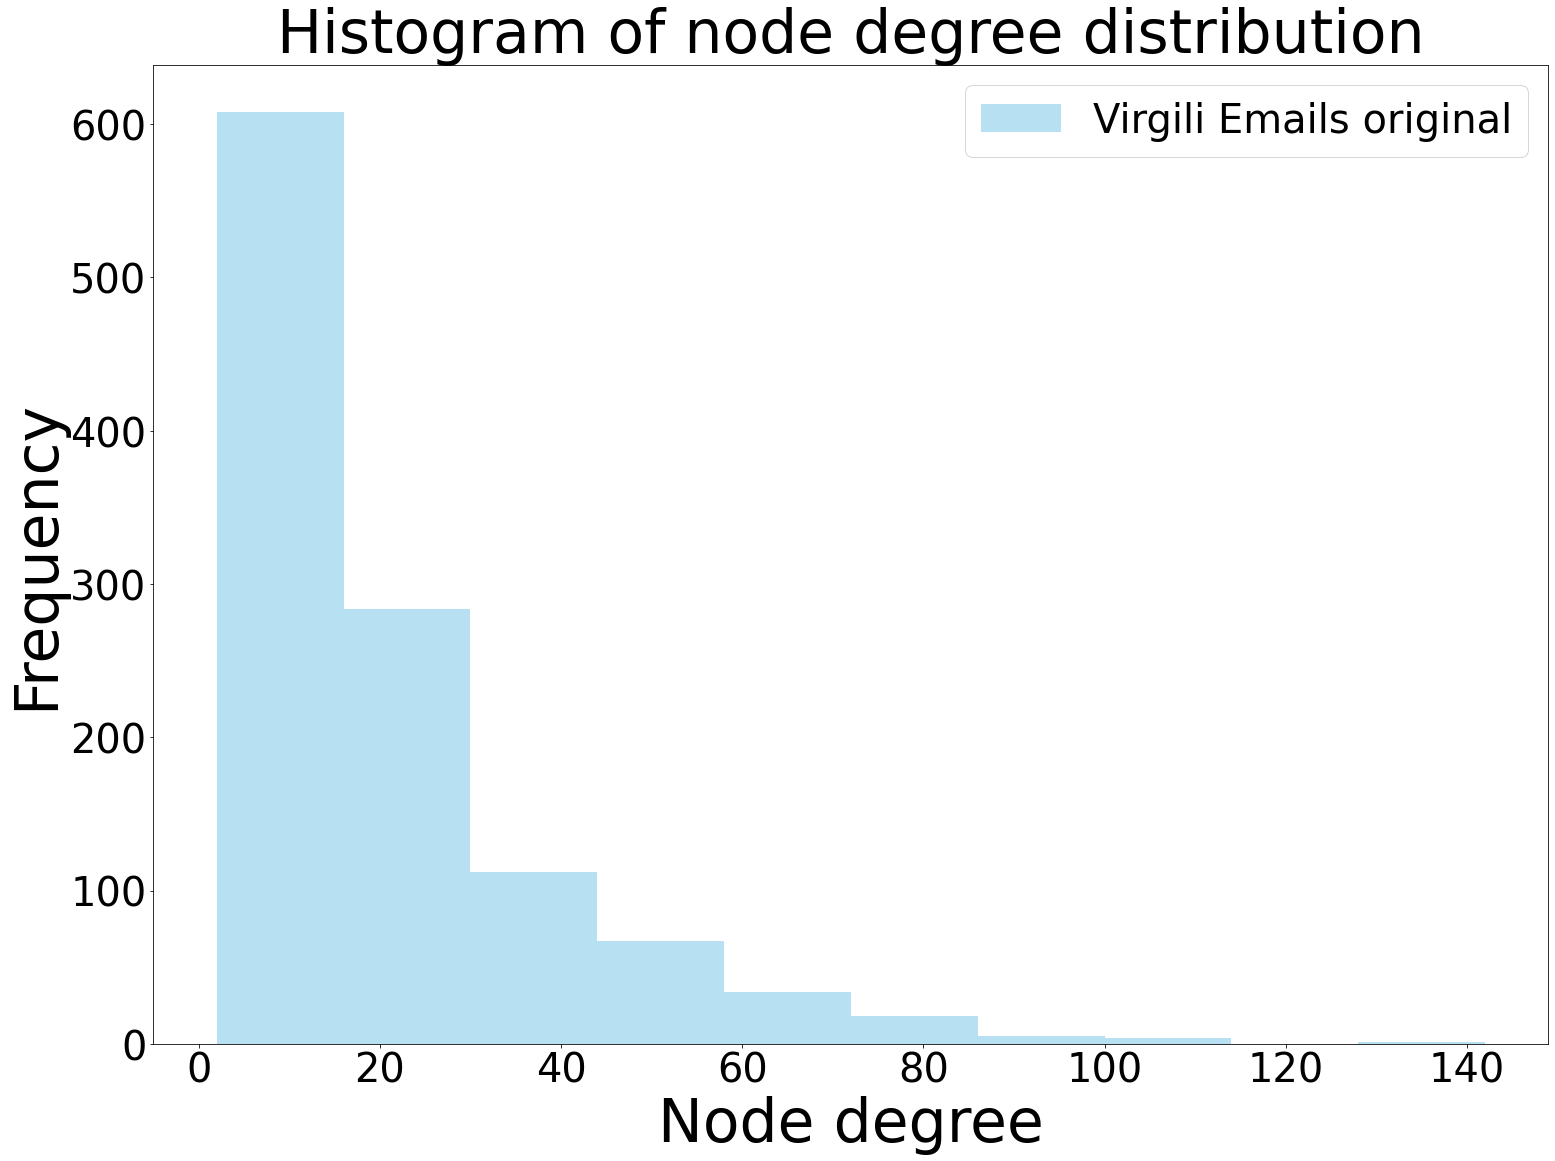

In [6]:
plt.figure(2)
plt.hist(deg, histtype='stepfilled', color = "skyblue", alpha=0.6, label = 'Virgili Emails original')
# plt.hist(r40, histtype='step', alpha=0.2, label = 'reconstructed 40')
# plt.hist(r80, histtype='step', alpha=0.5, label = 'reconstructed 80')
# plt.hist(r99, histtype='step', alpha=0.7, label = 'reconstructed 99')


plt.title('Histogram of node degree distribution', fontsize = 60)
plt.xlabel('Node degree', fontsize = 60)
plt.ylabel('Frequency', fontsize = 60)
plt.rcParams['figure.figsize'] = [25, 18]

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize=40)
plt.rc('legend',fontsize=40)


plt.legend()
plt.show()